In [64]:
# Import necessary libraries and set plot option
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.spatial as spatial

# 2D Geometry

In this module you will be asked to do some common geometric tasks in two dimensions.

In [7]:
# Create 5 random points in the unit square, call them A, B, C, D, E
#
#  Notice that X_random is an array or matrix of 5 rows and 2 columns.
#

X_random = np.random.rand(5,2)
#
#  Notice that if we refer to X_random with a single index, that is a request for all the 
#  information on that row.  So A is the information in row 0 of X_random, so A is a 
#  mathematical vector, or a 1-dimensional array or list.
#
A = X_random[0]
B = X_random[1]
C = X_random[2]
D = X_random[3]
E = X_random[4]

print(X_random)

[[ 0.69523081  0.83676708]
 [ 0.40302386  0.65499517]
 [ 0.51346423  0.21952067]
 [ 0.27699909  0.21946209]
 [ 0.83643327  0.61027503]]


In [ ]:
# Compute the maximum and minimum values of the x and y components of X, store in max_x and max_y
# What is the area of the smallest rectangle (aligned with the cartesian coordinate axis) 
# that contains all the points in X? Store this value in smallest_area

print (min_x)
print (max_x)
print (min_y)
print (max_y)
print(smallest_area)

In [ ]:
# Calculate the distance from A to E, store in AE

print(AE)

In [ ]:
# Find which two points are closest, store their coordinates in F and G and the distance between then in FG

print (F)
print (G)
print (FG)

In [ ]:
# Calculate the centroid of the points in X, store in X_centroid.
#  The centroid is simply the average of the points.

print (X_centroid)

In [24]:
# Using np.meshgrid, create a grid of 5 equally spaced points in each direction over the unit square

x = np.linspace(0,1,5)
y = np.linspace(0,1,5)

[X,Y] = np.meshgrid(x,y)

print(X)
print(Y)

#
#  Use the plt.plot command to create a plot, and the show command to display them.
#
plt.plot ( X, Y, 'b*' )
plt.show ( )

[[ 0.   0.5  1. ]
 [ 0.   0.5  1. ]
 [ 0.   0.5  1. ]]
[[ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.   1.   1. ]]



## Numerical Integration

As in one dimension, a common task in two (or higher) dimesions is the approximation of integrals. Remember in 2D these are double integrals of the form:
$$ I = \int_{x=x_0}^{x=x_1}\int_{y=y_0}^{y=y_1} f(x,y)dy dy$$

Recall the numerical integration (quadrature) takes the form:
$$ I \approx \sum\limits_{i=1}^N q_i f(x_i,y_i)$$
where $\{q_i\}$ is the set of quadrature weights and $\{(x_i,y_i)\}$ is the set of quadrature points.

### Uniform Sampling 

The analogue of the left Reimann sum in 2D is basically a combination of left Reimann sums in both the x and y directions. This can be thought of as a left/bottom sum. Take $N$ evenly spaced points on the interval $[x_0,x_1]$ and $M$ evenly spaced points on the interval $[y_0,y_1]$. The quadrature then takes the form:
$$ I \approx \sum\limits_{i=1}^{N-1}\sum\limits_{j=1}^{M-1} f(x_i,y_j)\Delta x\Delta y,$$
where $\Delta x = \frac{x_1-x_0}{N-1}$ and $\Delta y=\frac{y_1-y_0}{M-1}$.

In [22]:
# Write a function reimann_sum_2d that takes as inputs 
# a number of points in the x direction Nx
# a number of points in the y direction Ny
# a function handle 
# and returns the approximate integral on the domain [0,1]x[0,1] calculated using the 2D Reimann sum as described above

def reimann_sum_2d(Nx, Ny, f):
    
    x = np.linspace(0,1,Nx)
    y = np.linspace(0,1,Ny)
    
    dx = 1/(Nx-1)
    dy = 1/(Ny-1)
    
    int_approx = 0
    [X,Y] = np.meshgrid(x,y)

    for i in range(0,Nx-2):
        for j in range(0,Ny-2):
            int_approx += f(X[i,j],Y[i,j])*dx*dy
        
    return int_approx

[0.15201822916666666, 0.10834757486979166, 0.065028826395670564, 0.035638521114985139, 0.018655877249936254]


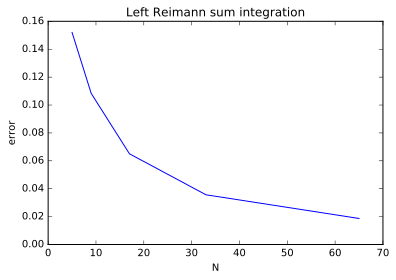

In [23]:
# Test this function on f(x,y)=x^2y for Nx = Ny =5,9,17,33, store the errors in a list called err_reimann

N_list = [5,9,17,33,65]
err_reimann = []

f = lambda x,y: x**2*y
int_exact = 1/6

for n in N_list:
    # call your left_reimann_sum with n and f, store in int_reimann   
    int_reimann = reimann_sum_2d(n,n,f)
    err_reimann.append(abs(int_exact - int_reimann))

# print and plot results
print(err_reimann)
plt.plot(N_list, err_reimann)
plt.xlabel('N')
plt.ylabel('error')
plt.title('Left Reimann sum integration')

### Random Sampling

Monte Carlo integration works almost the same way in 2D as in 1D. Given $N$ random points $\{x_i,y_i\}$ over the interval [0,1]x[0,1], we can approximate an integral over the unit square as:
$$ \int_0^1\int_0^1 f(x,y) dx \approx \frac{1}{N}\sum\limits_{i=1}^N f(x_i,y_i).$$

In [38]:
# Write a function monte_carlo_integration_2d that takes as inputs 
# a number of points N 
# a function handle f(x,y)
# and returns the approximate integral on the unit square calculated using Monte Carlo integration

def monte_carlo_integration_2d(N, f):
    
    int_approx = 0
    for i in range(1,N):
        p_rand = np.random.rand(2,1)
        int_approx += f(p_rand[0],p_rand[1])/N
        
    return int_approx

[array([ 0.09316994]), array([ 0.01956264]), array([ 0.00262455]), array([ 0.00128119]), array([ 0.00118469]), array([  9.72129533e-05])]


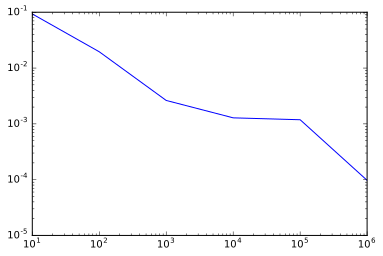

In [39]:
# Test this function on f(x,y)=x^2y for N=10,100,1000,10000,100000,1000000, plot the error vs N on a log-log plot

N_list = [10,100,1000,10000,100000,1000000]
err_monte_carlo = []
f = lambda x,y: x**2*y

int_exact = 1/6

for n in N_list:
    # call your monte_carlo_integration with n and f, store in int_monte_carlo
    int_approx = monte_carlo_integration_2d(n,f)
    err_monte_carlo.append(abs(int_approx - int_exact))

# print and plot results
print(err_monte_carlo)
plt.loglog(N_list, err_monte_carlo)


### Estimating Area

A simple way to estimate the area of an object is to use random sampling. Create a box that encloses the object, this box has area $B = (x_{\text{max}}-x_{\text{min}})(y_{\text{max}}-y_{\text{min}})$. Then choose $N$ random points inside the box. Count the number of these points, $M$, that lie inside the object. The area $A$ of the object can then be approximated by:
$$ A \approx \frac{M}{N}B$$

Working with circles is easy because we can quickly determine whether a point is inside or outside the circle. Consider the circle of radius $r$ centered at $(x_c,y_c)$. A bounding box can be shown to be $[x_c-r, x_c+r]\times[y_c-r,y_c+r]$, with area $B=4r^2$. 

Recall that a point $(x,y)$ is inside a circle of radius $r$ centered at $(x_c,y_c)$ only if $(x-x_c)^2 + (y-y_c)^2\leq r^2$.

In [54]:
# Using the information above, write a function circle_area that takes as inputs:
# the centre point of the circle
# the radius of the circle
# a number of points N
# and returns the approximate area of the circle calculated using random sampling

def circle_area(c, r, N):

    xmin = c[0]-r
    xmax = c[0]+r
    ymin = c[1]-r
    ymax = c[1]+r

    M = 0
    B = 4*r**2

    for i in range(1,N):
        p_rand = np.random.rand(2,1)
        p_rand[0] = p_rand[0]*(xmax-xmin)+xmin
        p_rand[1] = p_rand[1]*(ymax-ymin)+ymin

        if ((p_rand[0] - c[0])**2 + (p_rand[1] - c[1])**2 <= r**2):
            M = M+1

    print(M)
    return B*M/N
    

9
78
774
7862
78748
785398
[0.458407346410207, 0.02159265358979301, 0.04559265358979303, 0.003207346410206924, 0.008327346410206715, 6.535897929538237e-07]


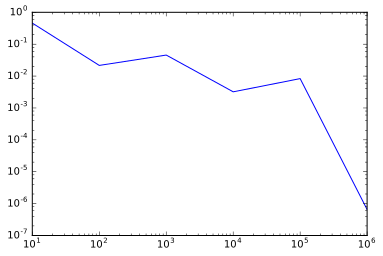

In [58]:
# Test your function on the circle of radius 1 centered at (0.25,0.5) for N=100,1000,10000
# Print and plot your errors on a loglog plot

N_list = [10,100,1000,10000,100000,1000000]
err_area = []

area_exact = np.pi
r = 1
c = [0.25,0.5]

for n in N_list:
    # call your monte_carlo_integration with n and f, store in int_monte_carlo
    area_approx = circle_area(c,r,n)
    err_area.append(abs(area_approx - area_exact))

# print and plot results
print(err_area)
plt.loglog(N_list, err_area)



## Voronoi, Delaunay

In this section we present briefy the commands necessary to create Voroni diamgrams and Delaunay triangulations.

In [89]:
# Create 20 random points in the unit square

X_random = np.random.rand(20,2)

In [90]:
# The Voronoi diagram of a set of points X divides up a region by assigning to each point
# all the space that is closest to it.
#
# If we are working in 1 dimension, then the Voronoi diagram of 3 points A, B, C on a line
# would use dividing lines halfway between each pair of points:
#
#  The line:             ...-----A-----------B-----C-----...
#
#  The Voronoi diagram:  ...aaaaaAaaaaa|bbbbbBbb|ccCccccc...
#
#  In two dimensions, the possibilities become much more complicated.
#
# Use the scipy.spatial.Voronoi command to create the Voronoi diagram for the random point.
# (This only creates a description of the diagram).  
#
#  Store the result in "vor".  
#
#  When we draw the Voronoi diagram, we will see that the "countries" that are created
#  are polygons.  The vertices of these polygons are stored in the "vertices" component
#  which can be examined by printing vor.vertices.  
#
vor = spatial.Voronoi(X_random)
print(vor.vertices)

[[-0.0120218   0.1251658 ]
 [ 1.24760268  0.74815525]
 [-2.39922558  2.5526142 ]
 [-0.85703874  1.39847578]
 [ 0.7595011   0.75906826]
 [ 0.58111545  0.72509793]
 [ 0.57969615  0.73184362]
 [ 0.66110213  1.29863082]
 [ 0.82179349  0.62670757]
 [ 0.77069518  0.51780482]
 [ 1.00727818  0.62719286]
 [ 0.89693899  0.50581438]
 [ 1.36253404  0.20156439]
 [ 0.96002685  0.31195028]
 [ 0.23464152  0.50072679]
 [ 0.65304105  0.45084753]
 [ 0.51757345  0.68794999]
 [ 0.56606502  0.69779332]
 [ 0.98629473  0.81091594]
 [ 0.76595018  1.05714174]
 [ 0.76094355  0.76025316]
 [ 0.33373438  0.3359361 ]
 [ 0.27093906  0.41668382]
 [-0.00593701  0.13238383]
 [ 0.07326639  0.29358234]
 [ 0.88494043  0.30556158]
 [ 0.64567027  0.41524903]
 [ 0.45799802  0.2250815 ]
 [ 0.78044038  0.13803019]
 [ 0.54168682 -0.15068139]
 [ 0.47533026  0.03304408]]


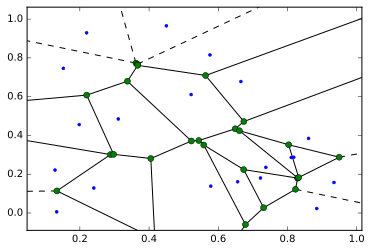

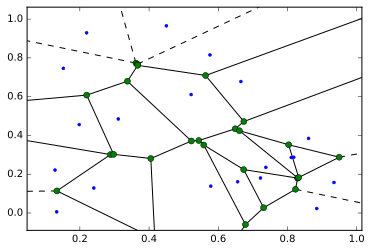

In [73]:
# To actually see the Voronoi diagram, we have to call a separate program to plot the Voronoi diagram we called "vor".

spatial.voronoi_plot_2d(vor)

In [82]:
# Now we can think about our set of points X as the "capitals" of their little polygonal countries.
#
#  The Delaunay triangulation allows us to build roads between every pair of capitals that have a
#  common border.  When we have all the roads built, we see a network of triangles, which has 
#  some important properties we will talk about later.
#
#  For the same random points that we created earlier, call scipy.spatial.Delaunay and save the
#  result in "triangulation"
#
#  The Delaunay program will organize the points (capitals) into triangles, that is, groups of 3.
#  If we wish to understand how these triangles are organized, we can examine the "simplices"
#  component of the triangulation.  Since we have 20 points, each triangle will be described by
#  three numbers between 0 and 19.
#  
triangulation = spatial.Delaunay(X_random)
print(triangulation.simplices)

[[ 1  9 15]
 [ 4  9  8]
 [18  6 19]
 [11  2 13]
 [ 2  0 13]
 [ 9  0 15]
 [ 0  9 13]
 [11  0  2]
 [ 5 18  3]
 [ 7  4  8]
 [19  7  8]
 [ 6  7 19]
 [17  6 13]
 [ 9 17 13]
 [17  9  4]
 [ 7 17  4]
 [17  7  6]
 [16  6 18]
 [ 5 16 18]
 [14  5  3]
 [14 11 13]
 [14 16  5]
 [ 6 14 13]
 [16 14  6]
 [11 10  3]
 [14 12 11]
 [12 10 11]
 [12 14  3]
 [10 12  3]]


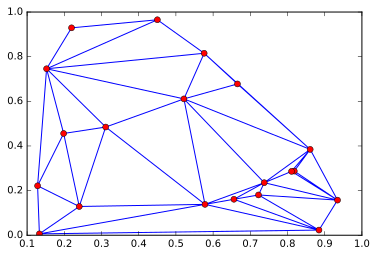

In [88]:
#  The Delaunay triangulation is a very visual thing.
#
#  But to see it, we actually have to call another function.
#
#  Plot the Delaunay triangulation by calling the triplot() function, giving
#  a list of three things, the X coordinates, the Y coordinates, and the list of triangles.
#
#  The triplot program may want to rearrange the simplex information we give it, so
#  we only give it a "copy" of our data so we don't care what it does.
#
plt.triplot(X_random[:,0], X_random[:,1], triangulation.simplices.copy())
#
#  We can improve our plot a little by adding circles that indicate where our points were.
#
plt.plot(X_random[:,0], X_random[:,1], 'o')